# Exercise 9
Impement B-spline basis functions. [Lecture from 20.10, or Dahmen+Reusken, Chap 9] Knots are $t_0 \leq t_1 \leq \ldots \leq t_n$.
  \begin{eqnarray*}
    N_{j,1}(x)  & = & \chi_{[t_j, t_{j+1})} (x) \\
    N_{j,k}(x) & = & \frac{x-t_j}{t_{j+k-1}- t_j} N_{j,k-1}(x) +
                     \frac{t_{j+k}-x}{t_{j+k}-t_{j+1}}  N_{j+1,k-1}(x)
  \end{eqnarray*}
  for $j = 0, \ldots n-k-1$ and $k = 2, \ldots n-1$.
  
  a) What is the complexity of a recursive evaluation in a given point
    $x$ using this definition ?  What is the complexity if multiple evaluation of the
    same term is avoided ?  Searching the interval $[t_j, t_{j+1})$
    containing $x$ is a separate issue.
  
  b)
    Plot the basis functions once for knots $t_j = j$, and then for using $k$
    multiple knots at both ends, i.e. $t_0 = \ldots = t_{k-1}$ and
    $t_{n-k+1} = \ldots = t_n$.
  
  c)
    Plot $\sum_{j=0}^{n-k-1} N_{j,k}$
  
  d)
    How do basis functions look like for multiple internal knots  ? 
  

a) Each function call yields 2 recursive function calls. The maximal recursion depth is of order $n$, which results in $\mathcal{O}(2^n)$ operations. 

If terms are efficiently stored without computing them twice, in each recursion layer we can omit 2 calculations each. In other words, only 2 terms need to be computed per layer, which sums up to $\mathcal{O}(n^2)$ overall operations.

In [1]:
#b)
import numpy as np
import matplotlib.pyplot as plt

def Bspline(t, j, k, x):
    if k == 1:
        return 1 if (x >= t[j] and x < t[j+1]) else 0 
    else:
        #necessary for equal inner nodes
        w1 = 0 if t[j+k-1] == t[j] else (x-t[j]) / (t[j+k-1] - t[j])
        w2 = 0 if t[j+k] == t[j+1] else (t[j+k] - x) / (t[j+k] - t[j+1])
        return  w1 * Bspline(t, j, k-1, x) + w2 * Bspline(t, j+1, k-1, x)
   
a = 0
b = 5
t = [-2,-1,0,1,2,3,4, 5, 6, 7]
#t = [a,a,a,1,2,3,4, b, b, b]

eps = 1e-10
x = np.linspace(a-2+eps,b+2-eps,100)
n = len(t)

for k in range(1,n):
    print('order k = ', k)
    for j in range(n-k):
        print('number j = ', j)
        y = [Bspline(t, j, k, xi) for xi in x]
        plt.plot(x,y)
        plt.show()

order k =  1
number j =  0


number j =  1


number j =  2


number j =  3


number j =  4


number j =  5


number j =  6


number j =  7


number j =  8


order k =  2
number j =  0


number j =  1


number j =  2


number j =  3


number j =  4


number j =  5


number j =  6


number j =  7


order k =  3
number j =  0


number j =  1


number j =  2


number j =  3


number j =  4


number j =  5


number j =  6


order k =  4
number j =  0


number j =  1


number j =  2


number j =  3


number j =  4


number j =  5


order k =  5
number j =  0


number j =  1


number j =  2


number j =  3


number j =  4


order k =  6
number j =  0


number j =  1


number j =  2


number j =  3


order k =  7
number j =  0


number j =  1


number j =  2


order k =  8
number j =  0


number j =  1


order k =  9
number j =  0


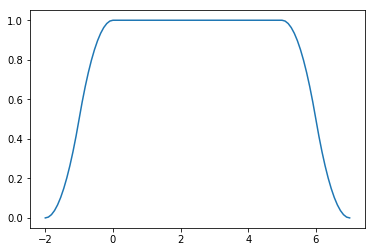

In [2]:
#c)
def SumBplines(t, k, x):
    result = 0
    for j in range(len(t)-k):
        result += Bspline(t, j, k, x)
    return result

k = 3
t = [-2,-1,0,1,2,3,4,5,6,7]
y = [SumBplines(t, k, xi) for xi in x]
plt.plot(x,y)
plt.show()

order k =  1
number j =  0


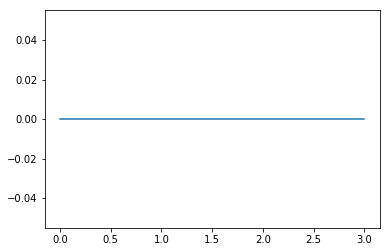

number j =  1


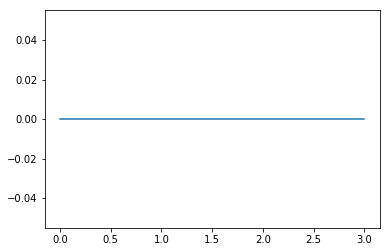

number j =  2


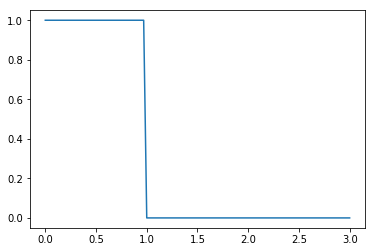

number j =  3


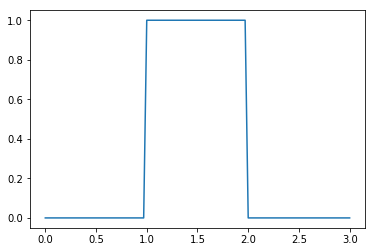

number j =  4


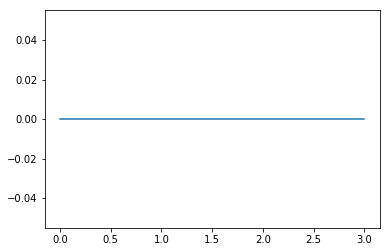

number j =  5


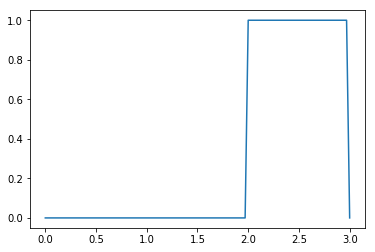

number j =  6


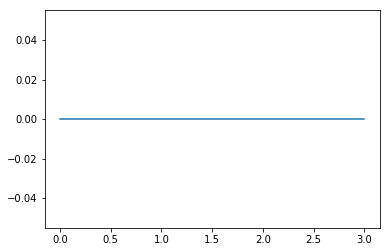

number j =  7


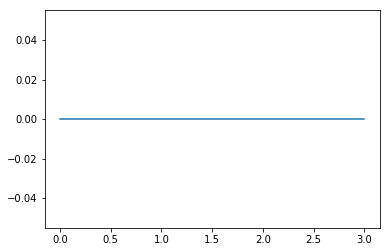

order k =  2
number j =  0


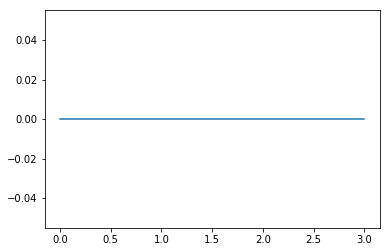

number j =  1


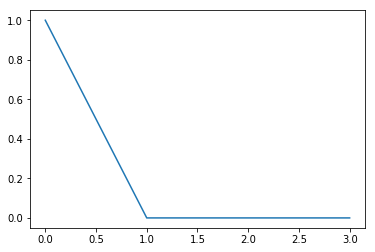

number j =  2


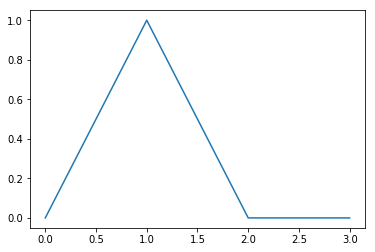

number j =  3


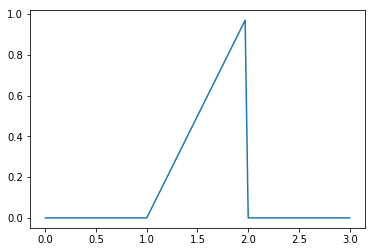

number j =  4


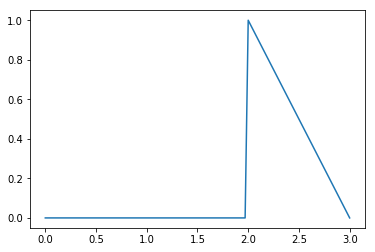

number j =  5


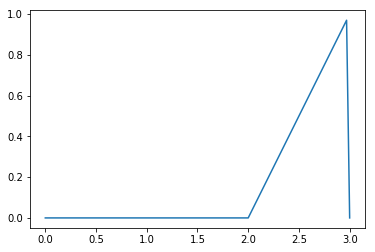

number j =  6


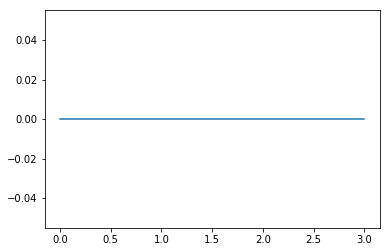

order k =  3
number j =  0


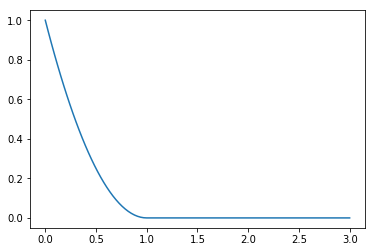

number j =  1


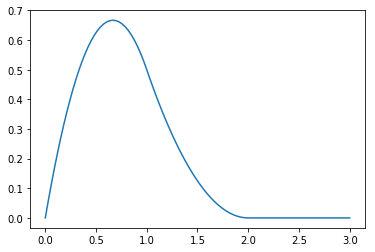

number j =  2


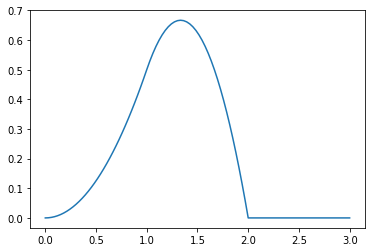

number j =  3


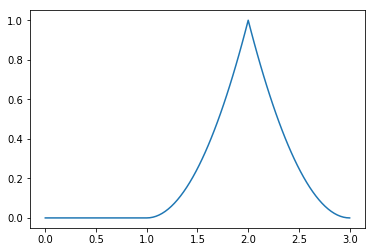

number j =  4


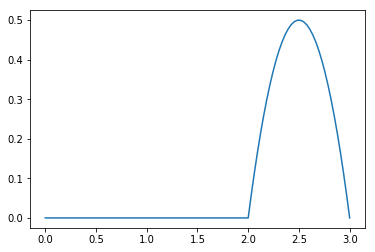

number j =  5


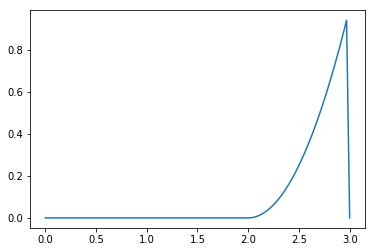

In [3]:
#d)
t = [0, 0, 0, 1, 2, 2, 3, 3, 3]
x = np.linspace(0,3,100)
n = len(t)

for k in range(1,4):
    print('order k = ', k)
    for j in range(n-k):
        print('number j = ', j)
        y = [Bspline(t, j, k, xi) for xi in x]
        plt.plot(x,y)
        plt.show()

For multiple internal knots, the corresponding constant basis functions vanish and the recurrence relation is not well-defined. The latter can be alliviated by setting the linear factor in front of the respetive Bspline to $0$, if the denominator vanishes.

# Exercise 10

Implement the de Boor algorithm (Dahmen+Reusken Alg 9.12) for evaluating spline functions $\sum c_j N_{j,k}(x)$. Familiarize yourself also with the scipy.interpolate.splev function and related functions.

Consider the curve given by $\gamma : [0, 1] \rightarrow \mathbb{R}^2: t \mapsto  ( (t+1) \cos (4 \pi t), (t+1) \sin (4 \pi t))$.

Choose control points $p_j = \gamma(j / n)$, and plot the spline functions
$$
  t \mapsto \sum_{j = 0}^n  p_j N_{j,k}(t)
$$
for $k = 1, 2, 3, 4$. Choose uniformly distributed knots, with $k$ multiple knots at the ends.

Note that choosing the control points at the curve does not lead to optimal approximation of the curve by the spline - curve. 

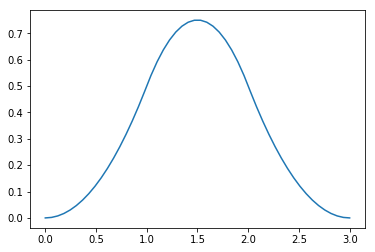

In [4]:
from scipy import interpolate

x = np.linspace(0,2*np.pi,40)
y = np.sin(x)

def deBoor(t, c, k, x):
    #find Interval I = [tm, tm+1), such that x in I
    m = 0
    for i in range(1,len(t)):
        if x < t[i]:
            m = i-1
            break
    #more efficient with vector instead of matrix
    mat = np.zeros((len(c), len(c)))
    mat[:,0] = c 
    for p in range(1, k):
        for j in range(m-k+1+p,m+1):
            if (t[j+k-p] == t[j]):
                mat[j,p] = 0
            else:
                mat[j,p] = (x-t[j]) / (t[j+k-p] - t[j]) * mat[j,p-1] + (t[j+k-p] - x) / (t[j+k-p] - t[j]) * mat[j-1,p-1]    
    return mat[m,k-1]


t = [0, 0, 0, 1, 2, 3, 3, 3]
c = [0, 0, 1, 0, 0]
k = 3
x= np.linspace(0,3)
#plot 3rd basisvector
plt.plot (x, [deBoor(t,c,k,xi) for xi in x])
plt.show()

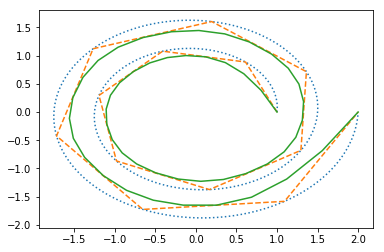

In [5]:
gamma1 = lambda t: (t+1)*np.cos(4*np.pi*t)
gamma2 = lambda t: (t+1)*np.sin(4*np.pi*t)

l = 10
k = 3
n = l+k
c1 = [gamma1(i/n) for i in range(n+1)]
c2 = [gamma2(i/n) for i in range(n+1)]

t = []
t.extend([0 for i in range(k-1)])
t.extend(np.linspace(0,1,l+3))
t.extend(1 for i in range(k-1))

#for visualization
eps = 1e-10

x = np.linspace(eps,1-eps)
y1 = [deBoor(t,c1,k,xi) for xi in x]
y2 = [deBoor(t,c2,k,xi) for xi in x]

n = 1000
chat1 = [gamma1(i/n) for i in range(n)]
chat2 = [gamma2(i/n) for i in range(n)]

plt.plot(chat1,chat2, ':')
plt.plot(c1,c2, '--')
plt.plot (y1,y2)
plt.show()

In [8]:
from scipy import interpolate
from scipy.fft import fft
import time

$$
\newcommand{\setB}{{\mathbb B}}
\newcommand{\setR}{{\mathbb R}}
\newcommand{\setN}{{\mathbb N}}
\newcommand{\setZ}{{\mathbb Z}}
\newcommand{\setQ}{{\mathbb Q}}
\newcommand{\setC}{{\mathbb C}}
$$

# Exercise 11
>Given a B-spline function of order $k$, with knots $t_i$ and coefficients $c_i$. Implement a function to compute the derivative as a B-spline function of order $k-1$.
>
>Test your function for computing tangent vectors to the curve from
Ex 10.


For a B-Spline basis function $ N_{j,k}(t)$ the derivative can be expressed as 

$$ 
\frac{d N_{j,k}(t)}{dt} = k \left( \frac{N_{j,k-1}(t)}{t_{j+k}-t_{j}} -\frac{N_{j+1,k-1}(t)}{t_{j+k+1}-t_{j+1}} \right).
$$

Therefore 

$$
\frac{d}{dt}\sum_{j = 0}^n  p_j N_{j,k}(t) = \sum_{j = 0}^{n-1} \frac{k(p_{j+1}-p_j)}{t_{j+k+1}-t_{j+1}}N_{j,k-1}(t)
$$



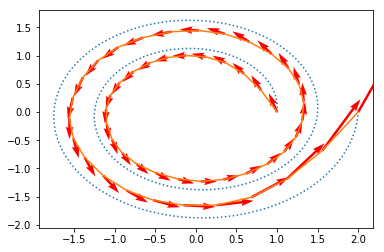

In [9]:
# from exercise 
from scipy import interpolate

x = np.linspace(0,2*np.pi,40)
y = np.sin(x)

def deBoor(t, c, k, x):
    #find Interval I = [tm, tm+1), such that x in I
    m = 0
    for i in range(1,len(t)):
        if x < t[i]:
            m = i-1
            break
    #more efficient with vector instead of matrix
    mat = np.zeros((len(c), len(c)))
    mat[:,0] = c 
    for p in range(1, k):
        for j in range(m-k+1+p,m+1):
            if (t[j+k-p] == t[j]):
                mat[j,p] = 0
            else:
                mat[j,p] = (x-t[j]) / (t[j+k-p] - t[j]) * mat[j,p-1] + (t[j+k-p] - x) / (t[j+k-p] - t[j]) * mat[j-1,p-1]    
    return mat[m,k-1]



gamma1 = lambda t: (t+1)*np.cos(4*np.pi*t)
gamma2 = lambda t: (t+1)*np.sin(4*np.pi*t)

l = 10
k = 3
n = l+k
c1 = [gamma1(i/n) for i in range(n+1)]
c2 = [gamma2(i/n) for i in range(n+1)]

t = []
t.extend([0 for i in range(k-1)])
t.extend(np.linspace(0,1,l+3))
t.extend(1 for i in range(k-1))

#for visualization
eps = 1e-10
x = np.linspace(eps,1-eps)

y1 = [deBoor(t,c1,k,xi) for xi in x]
y2 = [deBoor(t,c2,k,xi) for xi in x]

p1 = [k*(c1[j+1]-c1[j])/(t[j+k+1]-t[j+1]) for j in range(n)]
p2 = [k*(c2[j+1]-c2[j])/(t[j+k+1]-t[j+1]) for j in range(n)]


z1 = np.array([deBoor(t[1:],p1,k-1,xi) for xi in x])/30
z2 = np.array([deBoor(t[1:],p2,k-1,xi) for xi in x])/30

n = 1000
chat1 = [gamma1(i/n) for i in range(n)]
chat2 = [gamma2(i/n) for i in range(n)]

plt.plot(chat1,chat2, ':')
plt.plot (y1,y2)
plt.quiver(y1,y2, z1,z2, units='xy' ,scale=2, color='red')

plt.show()

# Exercise 12

> Given are values $f_j = f(x_j)$ for $x_j = j/n$, with $n = 2^p$. Compute the coefficients of the Discrete Fourier Transfrom (DFT)
>$$
a_k = \frac{1}{n} \sum_{j = 0}^{n-1} e^{-\frac{2 \pi i j k}{n}} f_j
$$
using the FFT algorithm from scipy.
>
> * How big can you chose $n$ such that the run-time for the FFT is below 1 second on your computer ?  How long would a straight forward evaluation of the DFT of the same size by a matrix-vector product take ? How much memory would be required ? 
>      
> * How are the coefficients $a_k$ and $a_{n-k}$ related ? 
>
> * Test the functions $f : [0,1] \rightarrow \setR$:
$$
      \begin{eqnarray*}
        f_1(x) & = & \sin( 40 \pi x) \\
        f_2(x) & = & \chi_{[0.25,0.75)} \\
        f_3(x) & = & \min \{x, 1-x \}  \\
        f_4(x) & = & e^ { -100  (x-0.5)^2 } \\
        f_5(x) & = & e^ { -4 (x-0.5)^2 } \\
        f_6(x) & = & e^ { -100 (x-0.5)^2 }   \sin(40 \pi x)\\
      \end{eqnarray*}
$$
>
>
> * How fast do coefficients fall for $i \in [0, n/2)$, i.e. find $C$ and $\beta$ such that $|a_i|   \leq C i^{-\beta}$, by visual inspection ? Try to explain your observations.

Due to the Euler identity $e^{2i\pi} = 1$ it holds
$$
a_{n-k} = \frac{1}{n} \sum_{j = 0}^{n-1} e^{2\pi ij\left(-1+\frac{k}{n}\right)} f_j = \frac{1}{n} \sum_{j = 0}^{n-1} e^{\frac{2 \pi i j k}{n}} f_j = \overline{a_k}.
$$


fft time function 1: 1.35e-02
fft time function 2: 4.14e-03
fft time function 3: 3.75e-03
fft time function 4: 4.83e-03
fft time function 5: 5.26e-03
fft time function 6: 6.30e-03


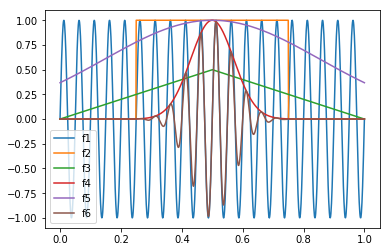

In [10]:
# %matplotlib notebook
# y[k] = np.sum(x * np.exp(-2j * np.pi * k * np.arange(n)/n))

p = 17 # p = 22 -> 1.3s, p = 21 -> 0.6s
n = 2**p
x = np.array([j/n for j in range(n)])
f = [lambda x: np.sin(40*np.pi*x), 
     np.vectorize(lambda x: 1 if x>= 0.25 and x < 0.75 else 0),
     np.vectorize(lambda x: x if x < 1-x else 1-x),
     lambda x: np.exp(-100*(x-0.5)**2),
     lambda x: np.exp(-4*(x-0.5)**2),
     lambda x: np.exp(-100*(x-0.5)**2)*np.sin(40*np.pi*x)]

xval = np.linspace(0,1, 1000)
a = []

for j in range(len(f)):
    y = f[j](x)
    t1 = time.time()
    a += [fft(y)/n]
    fft_time = time.time()-t1
    plt.plot(xval, f[j](xval), label="f{}".format(j+1))
    print("fft time function {}: {:.2e}".format(j+1, fft_time))

plt.legend()



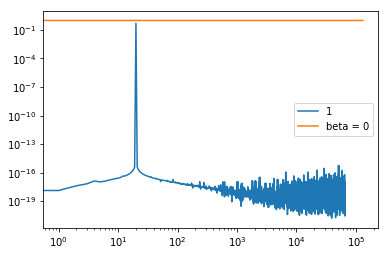

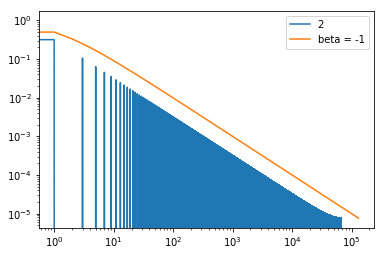

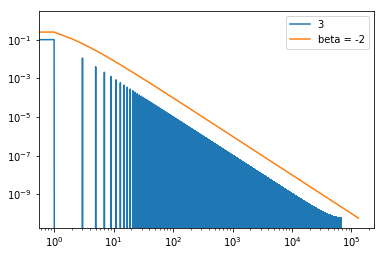

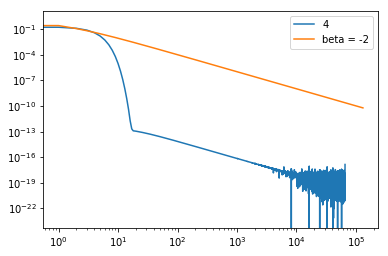

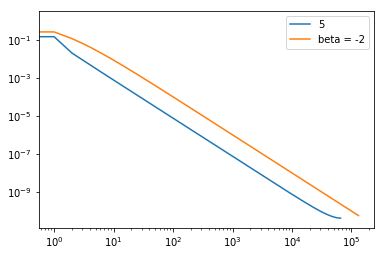

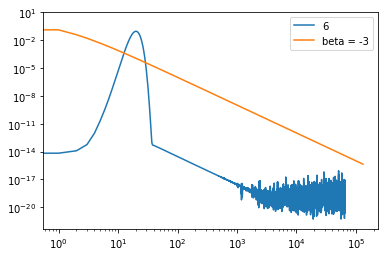

In [11]:
beta = [0, -1, -2, -2, -2, -3, -1]
for j in range(len(a)):
    plt.figure()
    plt.loglog(np.absolute(a[j][:2**(p-1)]), label=j+1)
    plt.loglog(np.arange(1, n+1, dtype=float)**(beta[j]), label='beta = {}'.format(beta[j]))
    plt.legend()
    plt.show()


The straight forward evaluation reads as 
$$
a = \frac{1}{n}\text{DFT}_n f
$$

and therefore takes $2n^2$ flops (floating point operations). Now we can look at the FFT algorithm (Algorithm 1.46) in the script and count the operations necessary for computation of the Fourier coefficients. We get the recurrence relation

$$
T(n) = 2T(\frac{n}{2})+\frac{3n}{2} ~, \qquad T(1) = 1
$$

which resolves to $T(n) = \log_2(n)\frac{3n}{2} = \frac{3pn}{2}$. In theory the forward evaluation should take by about a factor of $\frac{4}{3p}2^{p}$ more time than the FFT. 

An allocation of a dense matrix of the necessary size is not possible.

In [12]:
p = 23 # p = 22 -> 0.5s, p = 23 -> 0.6s
n = 2**p
x = np.array([j/(n) for j in range(n)])
f = lambda x: x*x
y = f(x)
t1 = time.time()
a = fft(y)
fft_time = time.time()-t1
print("fft time: ",fft_time)

print("calculated direct evaluation time: {:.2f} seconds = {:.2f} days".format(4/3/p*n*fft_time, 4/3/p*n*fft_time/360/24))

fft time:  0.6270725727081299
calculated direct evaluation time: 304942.96 seconds = 35.29 days
